MNIST dataset saved as mnist_data.csv and mnist_labels.csv


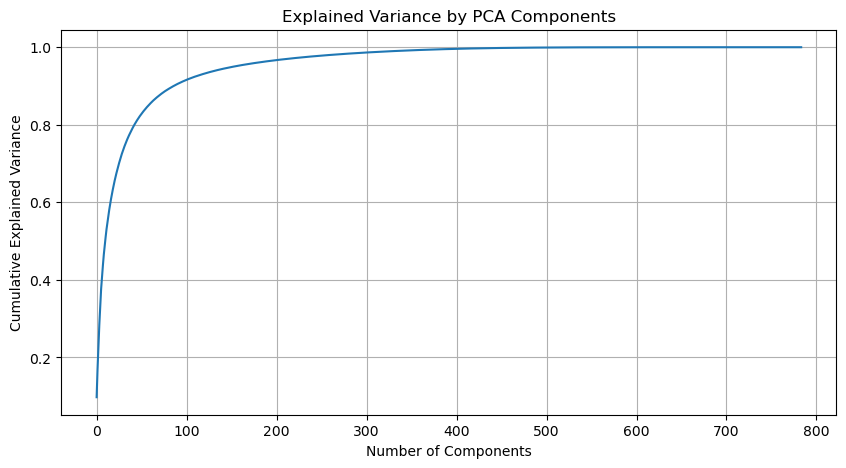

Cost after epoch 0: 0.6872855074682264
Cost after epoch 1: 0.6725849948996503
Cost after epoch 2: 0.658536138925292
Cost after epoch 3: 0.6451086495652997
Cost after epoch 4: 0.6322734369951559
Cost after epoch 5: 0.6200026048149686
Cost after epoch 6: 0.608269436589215
Cost after epoch 7: 0.5970483766897543
Cost after epoch 8: 0.5863150063923563
Cost after epoch 9: 0.5760460160915736
Cost after epoch 10: 0.5662191744131279
Cost after epoch 11: 0.5568132949191034
Cost after epoch 12: 0.5478082010206459
Cost after epoch 13: 0.5391846896366695
Cost after epoch 14: 0.5309244940659698
Cost after epoch 15: 0.523010246474587
Cost after epoch 16: 0.5154254403404418
Cost after epoch 17: 0.5081543931431738
Cost after epoch 18: 0.5011822095386447
Cost after epoch 19: 0.4944947452144573
Cost after epoch 20: 0.48807857158481033
Cost after epoch 21: 0.4819209414496901
Cost after epoch 22: 0.47600975571441734
Cost after epoch 23: 0.47033353124055693
Cost after epoch 24: 0.4648813698777459
Cost after

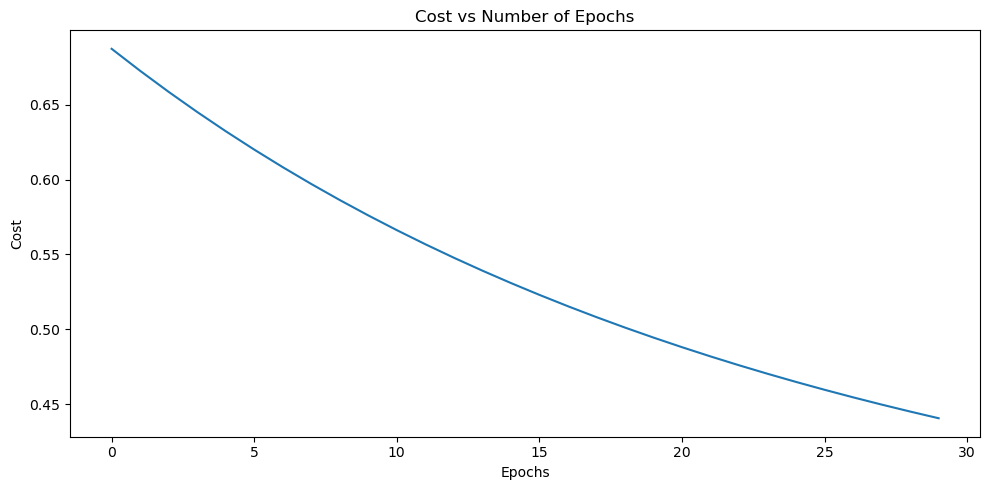

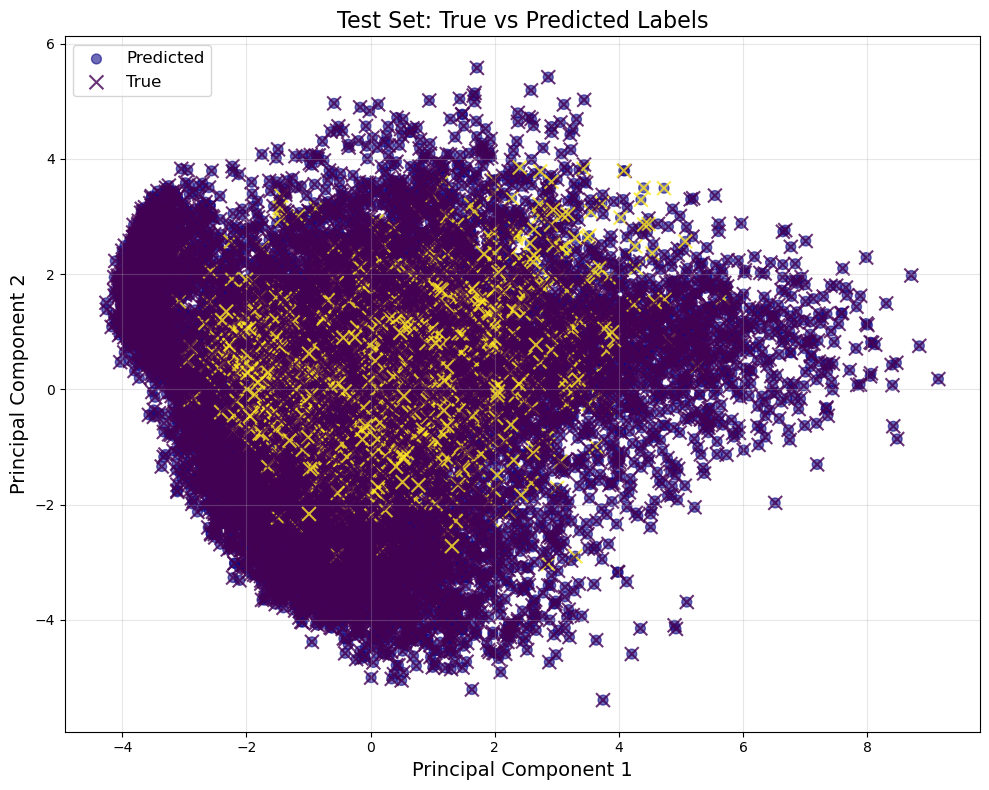

In [2]:
# use base(python 3.12.4)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler  # Using MinMaxScaler
from sklearn.decomposition import PCA
import pandas as pd

# Save MNIST dataset to CSV files
def save_mnist_to_csv():
    mnist = fetch_openml('mnist_784')
    X = mnist.data / 255.0  # Normalize the pixel values to [0, 1] range
    y = (mnist.target.astype(int) == 5).astype(int)  # Convert labels to binary (5 or not 5)

    # Convert to pandas DataFrame and Series
    X_df = pd.DataFrame(X)
    y_df = pd.Series(y, name='label')

    # Save to CSV
    X_df.to_csv("mnist_data.csv", index=False)  # Image data
    y_df.to_csv("mnist_labels.csv", index=False)  # Labels
    print("MNIST dataset saved as mnist_data.csv and mnist_labels.csv")
save_mnist_to_csv()

# Normalize the data
def normalize_data(X_train, X_test):
    scaler = MinMaxScaler()  # Changed to MinMaxScaler
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

# Activation functions and their derivatives
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return z * (1 - z)

# Initialize parameters
def initialize_parameters(layer_dims):
    parameters = {}
    L = len(layer_dims)
    
    for l in range(1, L):
        parameters[f'W{l}'] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters[f'b{l}'] = np.zeros((layer_dims[l], 1))
    
    return parameters

# Forward propagation
def forward_propagation(X, parameters):
    cache = {}
    A = X
    L = len(parameters) // 2
    
    for l in range(1, L + 1):
        Z = np.dot(parameters[f'W{l}'], A) + parameters[f'b{l}']
        A = sigmoid(Z)
        cache[f'A{l}'] = A
        cache[f'Z{l}'] = Z
    
    return A, cache

# Compute cost
def compute_cost(AL, Y):
    m = Y.shape[1]
    cost = -1/m * np.sum(Y * np.log(AL + 1e-10) + (1 - Y) * np.log(1 - AL + 1e-10))
    return cost

# Backward propagation
def backward_propagation(X, Y, parameters, cache):
    grads = {}
    L = len(parameters) // 2
    m = Y.shape[1]
    dAL = - (np.divide(Y, cache[f'A{L}']) - np.divide(1 - Y, 1 - cache[f'A{L}']))
    
    for l in reversed(range(1, L + 1)):
        dZ = dAL * sigmoid_derivative(cache[f'A{l}'])
        if l > 1:
            A_prev = cache[f'A{l-1}']
        else:
            A_prev = X
        
        grads[f'dW{l}'] = 1/m * np.dot(dZ, A_prev.T)
        grads[f'db{l}'] = 1/m * np.sum(dZ, axis=1, keepdims=True)
        
        if l > 1:
            dAL = np.dot(parameters[f'W{l}'].T, dZ)
    
    return grads

# Update parameters
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2
    
    for l in range(1, L + 1):
        parameters[f'W{l}'] -= learning_rate * grads[f'dW{l}']
        parameters[f'b{l}'] -= learning_rate * grads[f'db{l}']
    
    return parameters

# Main training function
def train_nn(X, Y, layer_dims, learning_rate=0.01, num_epochs=30):
    parameters = initialize_parameters(layer_dims)
    costs = []
    
    for i in range(num_epochs):
        AL, cache = forward_propagation(X, parameters)
        cost = compute_cost(AL, Y)
        grads = backward_propagation(X, Y, parameters, cache)
        parameters = update_parameters(parameters, grads, learning_rate)
        
        costs.append(cost)
        print(f"Cost after epoch {i}: {cost}")
    
    return parameters, costs

# Predict function
def predict(X, parameters):
    AL, _ = forward_propagation(X, parameters)
    predictions = (AL > 0.5).astype(int)
    return predictions

# Function to plot PCA variance
def plot_pca_variance(X):
    pca = PCA()
    pca.fit(X)
    plt.figure(figsize=(10, 5))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.title('Explained Variance by PCA Components')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid()
    plt.show()

# Function to plot scatter plot using PCA
def plot_pca_scatter(X, y_true, y_pred, title):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.figure(figsize=(10, 8))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred.flatten(), cmap='plasma', alpha=0.6, s=50, label='Predicted')  # Changed color map
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true.flatten(), marker='x', alpha=0.8, s=100, label='True')

    plt.title(title, fontsize=16)
    plt.xlabel('Principal Component 1', fontsize=14)
    plt.ylabel('Principal Component 2', fontsize=14)
    plt.legend(loc='upper left', fontsize=12)
    plt.grid(alpha=0.3)  # Add grid for better readability
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()

# Main execution
if __name__ == "__main__":
    # Load and normalize dataset
    X_train, X_test, y_train, y_test = load_mnist_dataset()
    X_train_scaled, X_test_scaled = normalize_data(X_train, X_test)
    
    # Convert y_train and y_test to NumPy arrays
    y_train = y_train.to_numpy()  # or use y_train.values
    y_test = y_test.to_numpy()
    
    # Optional: Plot PCA variance
    plot_pca_variance(X_train_scaled)  # Plotting variance for analysis

    # Define the neural network architecture
    layer_dims = [X_train_scaled.shape[1], 64, 32, 1]
    
    # Train the model
    num_epochs = 30  # Specify the number of epochs
    parameters, costs = train_nn(X_train_scaled.T, y_train.reshape(1, -1), layer_dims, num_epochs=num_epochs)
    
    # Make predictions
    train_predictions = predict(X_train_scaled.T, parameters)
    test_predictions = predict(X_test_scaled.T, parameters)
    
    # Calculate accuracy
    train_accuracy = np.mean(train_predictions == y_train.reshape(1, -1))
    test_accuracy = np.mean(test_predictions == y_test.reshape(1, -1))
    
    print(f"Train accuracy: {train_accuracy}")
    print(f"Test accuracy: {test_accuracy}")
    
    # Plot the cost vs number of epochs
    plt.figure(figsize=(10, 5))
    plt.plot(costs)
    plt.title("Cost vs Number of Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Cost")
    plt.tight_layout()
    plt.show()
    
    # Scatter plot of true vs predicted labels using PCA (for test set)
    plot_pca_scatter(X_test_scaled, y_test, test_predictions, "Test Set: True vs Predicted Labels")
